In [2]:
#import pandas as pd to read the file
import pandas as pd
import matplotlib.pyplot as plt

## Getting Data


In [3]:
# Read csvand save it in a DataFrame called data
data=pd.read_csv(r"M:\DownloadsV2\subset-3-sous-ensemble-3.csv")

## EDA

In [4]:
#first 5 rows
data.head()

,LEVEL1ID,LEVEL2ID,LEVEL3ID,LEVEL4ID,LEVEL5ID,SURVEYR,BYCOND,DESCRIP_E,DESCRIP_F,DEMCODE,...,SCORE100,ANSCOUNT,DEPT_E,DEPT_F,INDICATORID,INDICATORENG,INDICATORFRA,SUBINDICATORID,SUBINDICATORENG,SUBINDICATORFRA
0,0,0,0,0,0,2020,Q115 = 1,Male gender,Genre masculin,2011,...,75,73497,Public Service,Fonction publique,4,WORKPLACE,MILIEU DE TRAVAIL,14,Physical environment and equipment,Environnement physique et �quipement
1,1,0,0,0,0,2020,Q115 = 1,Male gender,Genre masculin,2011,...,79,11550,Canada Revenue Agency,Agence du revenu du Canada,4,WORKPLACE,MILIEU DE TRAVAIL,14,Physical environment and equipment,Environnement physique et �quipement
2,2,0,0,0,0,2020,Q115 = 1,Male gender,Genre masculin,2011,...,80,5626,Employment and Social Development Canada,Emploi et D�veloppement social Canada,4,WORKPLACE,MILIEU DE TRAVAIL,14,Physical environment and equipment,Environnement physique et �quipement
3,3,0,0,0,0,2020,Q115 = 1,Male gender,Genre masculin,2011,...,72,7308,Department of National Defence,Minist�re de la D�fense nationale,4,WORKPLACE,MILIEU DE TRAVAIL,14,Physical environment and equipment,Environnement physique et �quipement
4,4,0,0,0,0,2020,Q115 = 1,Male gender,Genre masculin,2011,...,64,3252,Correctional Service Canada,Service correctionnel Canada,4,WORKPLACE,MILIEU DE TRAVAIL,14,Physical environment and equipment,Environnement physique et �quipement


In [5]:
#information on the types of variables in data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405579 entries, 0 to 1405578
Data columns (total 35 columns):
 #   Column                           Non-Null Count    Dtype 
---  ------                           --------------    ----- 
 0   LEVEL1ID                         1405579 non-null  int64 
 1   LEVEL2ID                         1405579 non-null  int64 
 2   LEVEL3ID                         1405579 non-null  int64 
 3   LEVEL4ID                         1405579 non-null  int64 
 4   LEVEL5ID                         1405579 non-null  int64 
 5   SURVEYR                          1405579 non-null  int64 
 6   BYCOND                           1405579 non-null  object
 7   DESCRIP_E                        1405579 non-null  object
 8   DESCRIP_F                        1405579 non-null  object
 9   DEMCODE                          1405579 non-null  int64 
 10  QUESTION                         1405579 non-null  object
 11  TITLE_E                          1405579 non-null  object
 12  

### Understand Catagorical Variable

In [6]:
# Print the unique values of the "department" column
print(data.DEPT_E.unique())

['Public Service' 'Canada Revenue Agency'
 'Employment and Social Development Canada'
 'Department of National Defence' 'Correctional Service Canada'
 'Fisheries and Oceans Canada' 'Health Canada'
 'Public Services and Procurement Canada' 'Statistics Canada'
 'Agriculture and Agri-Food Canada'
 'Innovation, Science and Economic Development Canada'
 'Environment and Climate Change Canada' 'Transport Canada'
 'Immigration, Refugees and Citizenship Canada' 'Global Affairs Canada'
 'Natural Resources Canada' 'Royal Canadian Mounted Police'
 'Indigenous Services Canada' 'Veterans Affairs Canada'
 'Department of Justice' 'Canadian Heritage'
 'Public Service Commission of Canada'
 'Crown-Indigenous Relations and Northern Affairs Canada'
 'Immigration and Refugee Board of Canada' 'Department of Finance Canada'
 'Canadian Grain Commission' 'Treasury Board of Canada Secretariat'
 'Privy Council Office' 'Courts Administration Service'
 'Canadian Radio-television and TeleCommunications Commission'

* needs to be encoded??

In [7]:
# Print the unique values of the "demogrpahic" column
print(data.DESCRIP_E.unique())

['Male gender' 'Female gender' 'Gender diverse' 'Indigenous'
 'Non-Indigenous' 'First Nation (North American Indian)' 'M�tis'
 'Inuk (Inuit)' 'Person with a disability'
 'Not a person with a disability'
 'A seeing disability affects vision, including total blindness, partial sight and visual distortion'
 'A seeing disability affects vision, including total blindness, partial sight and visual distortion - Not selected'
 'A hearing disability affects ability to hear, including being hard of hearing, deafness or acoustic distortion'
 'A hearing disability affects ability to hear, including being hard of hearing, deafness or acoustic distortion - Not selected'
 'A mobility issue affects ability to move your body, including the required use of a wheelchair or a cane, or other issues impacting your mobility'
 'A mobility issue affects ability to move your body, including the required use of a wheelchair or a cane, or other issues impacting your mobility - Not selected'
 'An issue with flexib

* less catagory and have an oder with importance so needs to be define that

### updating datatype and encoding in department also odering by demographic?

<AxesSubplot:title={'center':'Demographic'}, xlabel='Dept', ylabel='Count of unique demographic'>

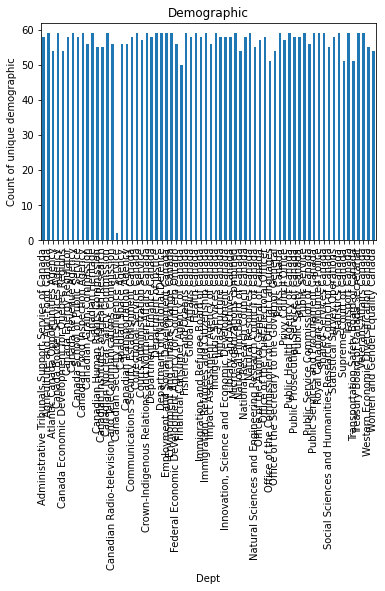

In [9]:
dfg = data.groupby(['DEPT_E'])['DESCRIP_E'].nunique()

dfg.plot(kind='bar', title='Demographic', ylabel='Count of unique demographic',
         xlabel='Dept')

In [10]:
print(dfg.sort_values(0).to_string())

DEPT_E
Canadian Security Intelligence Service                          2
Financial Consumer Agency of Canada                            50
Transportation Safety Board of Canada                          51
Supreme Court of Canada                                        51
Office of the Commissioner of Official Languages               51
Women and Gender Equality Canada                               54
Atlantic Canada Opportunities Agency                           54
Canada Economic Development for Quebec Regions                 54
National Film Board of Canada                                  54
Office of the Secretary to the Governor General                54
Natural Sciences and Engineering Research Council of Canada    55
Canadian Institutes of Health Research                         55
Western Economic Diversification Canada                        55
Social Sciences and Humanities Research Council of Canada      55
Canadian Human Rights Commission                               55
Can

In [11]:
dfg.mean()

56.39705882352941

Mean unqiue # of demographic repsoneses per fed dept is 56.4